
# Project: Investigate the No Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The "noshowappointments-kagglev2-may-2016" data set contains information about 100,000 medical appointments primarily focused on whether the patient presented themselves for an appointment. The data set contains information about the appointment and additional information about the patient. The columns in the data set are described below:

PatientId:        Patient Identifier /     
AppointmentID:    Appointment identifier to uniquely identify the appointment /
Gender:           The sex of the individual female of male /
ScheduledDay:     The date the medical appointment was scheduled by the patient or guardian /
AppointmentDay:   The date of the patients medical appointment / 
Age:              Patients age - On which date the age is calculated is not explained /
Neighbourhood:    The name of the neighborhood in which the appointment takes place /
Scholarship:      This indicates if the patient is enrolled in the Brazilian welfare program Bolsa Familia /
Hipertension:     Indicates if the patient has been diagnosed with hypertension /
Diabetes:         Indicates if the patient has been diagnosed with diabetes /
Alcoholism:       Indicates if the patient has been diagnosed with alcoholism /
Handcap:          Indicates if the patient has been diagnosed with a handicap /
SMS_received:     Indicates if the patient has been diagnosed with hypertension /
No-show:          Indicates if the patient showed up for the appointment /

Source for the above: https://www.kaggle.com/joniarroba/noshowappointments



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning
Let's rename some of the column headings so they are all lower case, make names consistent by using underscores
Change spellings to match that used in a medical setting for an English language speaker
  Change all column names to lower case
  Change - to underscore

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [4]:
# Correct the spelling of columns and change some names to make them more clear
# Then validate the change
df.rename(columns={'neighbourhood':'neighborhood', 'scholarship':'govt_assistance', 'hipertension':'hypertension', 'handcap':'disability','sms_received':'pt_sent_sms'}, inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighborhood,govt_assistance,hypertension,diabetes,alcoholism,disability,pt_sent_sms,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Find any missing values or any data that doesn't look correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid          110527 non-null float64
appointmentid      110527 non-null int64
gender             110527 non-null object
scheduledday       110527 non-null object
appointmentday     110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
govt_assistance    110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
disability         110527 non-null int64
pt_sent_sms        110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.isnull().any()

patientid          False
appointmentid      False
gender             False
scheduledday       False
appointmentday     False
age                False
neighborhood       False
govt_assistance    False
hypertension       False
diabetes           False
alcoholism         False
disability         False
pt_sent_sms        False
no_show            False
dtype: bool

In [7]:
# Since column no_show is so important to this data set need to check the values that exist
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
# So a couple if issues are observed
# 1 - There is one patient with an age of -1 which makes no sense so we should delete this row
# 2 - No missing values found, the data set is complete.
# 3 - Max patient age is 115 which is somewhat suspicious but since we have no birthdate in the data it is 
#         possible this is valid data.
df = df[df.age != -1]
df.shape

(110526, 14)

In [9]:
# Validate the row has been deleted
min_age = df.query('age == -1')
min_age

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighborhood,govt_assistance,hypertension,diabetes,alcoholism,disability,pt_sent_sms,no_show


In [10]:
# Let's check how many patients are 115 as it seems suspicious
df.query('age == 115')
# It's actually just two patients that are aged 115, while suspicious, since according to wikipedia they would be 
#    some of the oldest people alive, since no birthdate is supplied I will leave them in the data set.

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighborhood,govt_assistance,hypertension,diabetes,alcoholism,disability,pt_sent_sms,no_show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 
    Hypothesis: There will be a positive correlation between the length of time between making the appointment 
    and no show appointments. So the longer the time between the appointment was made and the date of the appointment
    the greater the no show rate. 

In [11]:
# When df.info() was run above, the date columns were shown to be type "object" and needs to be converted 
#   to type date and then drop the time component.
# I used this stackoverflow tip to figure out how to drop the time portion of the date.
# https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['scheduledday'] = df['scheduledday'].dt.date
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['appointmentday'] = df['appointmentday'].dt.date
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighborhood,govt_assistance,hypertension,diabetes,alcoholism,disability,pt_sent_sms,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Calculate number of days between the appointment date and the scheduled date
df['sch_appt_delta'] = (df['appointmentday'] - df['scheduledday']).dt.days

In [13]:
## Show unique days delta values and check for inconsistent data
df['sch_appt_delta'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

In [14]:
# Create a mask named showed and no_showed and filter out the data with the negative delta days since they 
#   makes no sense.
showed = ((df.no_show == 'No' ) & (df.sch_appt_delta > -1))
no_showed = ((df.no_show == 'Yes' ) & (df.sch_appt_delta > -1))

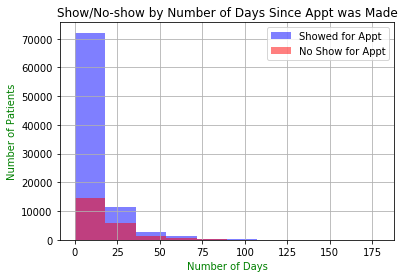

In [15]:
# Now plot the data
df.sch_appt_delta[showed].hist(alpha=0.5, color='blue', label='Showed for Appt') 
df.sch_appt_delta[no_showed].hist(alpha=0.5, color='red', label='No Show for Appt')
plt.title('Show/No-show by Number of Days Since Appt was Made')
plt.xlabel('Number of Days', color = 'green')
plt.ylabel('Number of Patients', color = 'green')
plt.legend()
plt.show();
# Actually there is no indication that the longer an appointment has been scheduled the more patients were no shows.

### Research Question 2  
Hypothesis: There may be a correlation between no show and age. It would make more sense that younger patients
would be more apt to skip an appointment than older patients. 

In [16]:
# In order to answer this question it would make sense to categorize the patients by age since using individual ages 
# would not look good on a plot. Categorize the patients by age as was done in a previous Udacity exercise.
def age_group(age):
    if age < 18:
        return "Under 18"
    elif age >= 18 and age <= 39:
        return "Young Adult"
    elif age > 39 and age <= 64:
        return "Middle Aged"
    elif age > 64 and age <= 79:
        return "Senior"
    elif age > 79 and age <= 99:
        return "Elderly"
    else: 
        return "Centarian"

In [17]:
df['age_grouping'] = df['age'].apply(age_group)
df.groupby('age_grouping').count()

In [ ]:
df.query('age == 115')
df_age[['No-show_Binary', 'Agebins']].groupby('Agebins').count()

In [75]:
df_male_showed = df[(df.no_show == "No") & (df.gender == "M") & (df.sch_appt_delta > -1)]

In [77]:
df_female_showed = df[((df.gender == 'F') & (df.no_show == 'No' ) & (df.sch_appt_delta > -1))]

In [78]:
df_male_no_showed = df[((df.gender == 'M') & (df.no_show == 'Yes' ) & (df.sch_appt_delta > -1))]

In [79]:
df_female_no_showed = df[((df.gender == 'F') & (df.no_show == 'Yes' ) & (df.sch_appt_delta > -1))]

In [88]:
df_male_showed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30962 entries, 1 to 110513
Data columns (total 16 columns):
patientid          30962 non-null float64
appointmentid      30962 non-null int64
gender             30962 non-null object
scheduledday       30962 non-null object
appointmentday     30962 non-null object
age                30962 non-null int64
neighborhood       30962 non-null object
govt_assistance    30962 non-null int64
hypertension       30962 non-null int64
diabetes           30962 non-null int64
alcoholism         30962 non-null int64
disability         30962 non-null int64
pt_sent_sms        30962 non-null int64
no_show            30962 non-null object
sch_appt_delta     30962 non-null int64
age_grouping       30962 non-null object
dtypes: float64(1), int64(9), object(6)
memory usage: 4.0+ MB


In [96]:
def plot_data(data, xLabel, yLabel, kind_str):
    fig, ax = plt.subplots()
    if kind_str == 'hist':  
        ax.hist(data)
        ax.set_xlabel(xLabel)
        ax.set_ylabel(yLabel)
        plt.show()

    elif kind_str == 'scatter':
        plt.scatter(data[0], data[1])
        ax.set_xlabel(xLabel)
        ax.set_ylabel(yLabel)
        plt.show()

JARDIM CAMBURI                 6.98
MARIA ORTIZ                    5.25
RESISTÊNCIA                    4.01
JARDIM DA PENHA                3.51
ITARARÉ                        3.18
CENTRO                         3.02
TABUAZEIRO                     2.83
SANTA MARTHA                   2.83
JESUS DE NAZARETH              2.58
BONFIM                         2.51
SANTO ANTÔNIO                  2.48
SANTO ANDRÉ                    2.33
CARATOÍRA                      2.32
JABOUR                         2.27
SÃO PEDRO                      2.21
ILHA DO PRÍNCIPE               2.05
NOVA PALESTINA                 2.05
ANDORINHAS                     2.05
DA PENHA                       2.01
ROMÃO                          2.00
GURIGICA                       1.83
SÃO JOSÉ                       1.79
BELA VISTA                     1.73
MARUÍPE                        1.72
FORTE SÃO JOÃO                 1.71
ILHA DE SANTA MARIA            1.71
SÃO CRISTÓVÃO                  1.66
REDENÇÃO                    

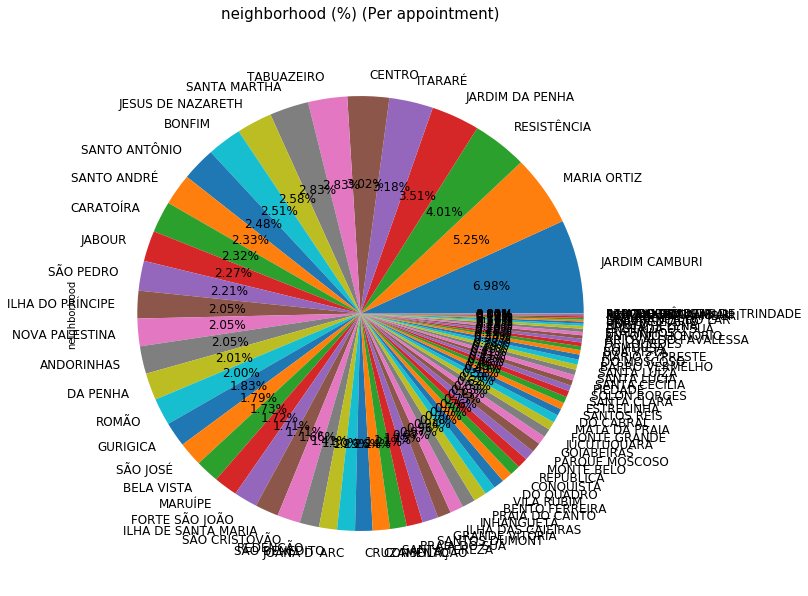

In [113]:
nbrhd_15 = list(df['neighborhood'].value_counts().nlargest(15).index)

## Step two: Create a new dataframe based on the list above

nbrhd_15 = df[df['neighborhood'].isin (nbrhd_15)]

## Step three: apply filteration on the Status column to include the NoShow records only

df_nbrhd_15_NoShow = df_nbrhd_15[df_nbrhd_15['Status']=='NoShow']

df_pie = df['neighborhood'].value_counts()
ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
ax.set_title('neighborhood' + ' (%) (Per appointment)\n', fontsize = 15);
np.round(df_pie/df.shape[0]*100,2)

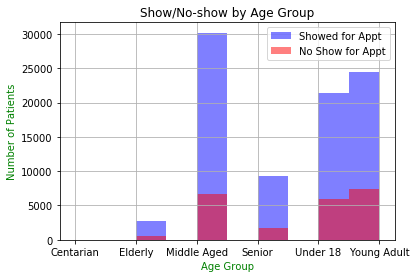

In [84]:
# Plot the show and no show rate by age group
df.age_grouping[showed].hist(alpha=0.5, color='blue', label='Showed for Appt') 
df.age_grouping[no_showed].hist(alpha=0.5, color='red', label='No Show for Appt')
plt.title('Show/No-show by Age Group')
plt.xlabel('Age Group', color = 'green')
plt.ylabel('Number of Patients', color = 'green')
plt.legend()
plt.show();

### Research Question 3  
Hypothesis: There may be a correlation between no show and disability. Since we do not have any additional information about the types of disabilities the data represents we will plot by disability type. 

In [27]:
# What are the types of disabilities
df['disability'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

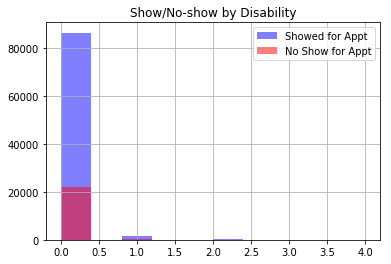

In [26]:
# Plot show/no show rate by disability
df.disability[showed].hist(alpha=0.5, color='blue', label='Showed for Appt') 
df.disability[no_showed].hist(alpha=0.5, color='red', label='No Show for Appt')
plt.title('Show/No-show by Disability')
plt.xlabel('Disability Type', color = 'green')
plt.ylabel('Number of Patients', color = 'green')
plt.legend()
plt.show();

<a id='conclusions'></a>
## Conclusions

The data in the "noshowappointments-kagglev2-may-2016" data set was relatively clean it was only when some data manipulation was performed that inconsistencies were discovered. 

Since I am relying on plots instead of statistical analysis any conclusions are based on observation not on any test of the null hypothesis or p value.

In research question #1 I looked at the delta between when an appointment was made with the assumpation that
the more time since an appointment had passed the more no shows. The plot does not bear out this assumption.
The plot shows that the most no shows actually occurred when the appointment was made closer to the actual appointment. It is unclear why that would be the case, some additional areas of investigation might be to check if a SMS was sent when the appointment was made so close to the appointment date itself.

In research question #2 I looked at how the age group might affect the no show rate. The assumption would be that younger people would be more likely to be no shows since they tend to have fewer medical issues. The plots would tend to indicate this is the case, patients in the senior, elderly and centarian categories were much more likely to show for an appointment than patients in the other groups.

In research question #3 I looked at the disability of patients and how that would affect the no show rate. 
There are 5 categories of disability but I could find no explanation of what these categories represented.
The plot did show that those patients with a disability in category 0 were much more likely to have appointments
and be no shows. Perhaps category 0 is not disabled but since we have no explanation on the meaning of this column 
data no conclusion can be made except as stated previously. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])